In [1]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd

rc('text',usetex = True)
rc('font', family='serif')

from scipy.optimize import curve_fit

In [12]:
def dTad(X,a,b,c): 
    T,H = X
    return (a)

In [13]:
workbook = xlrd.open_workbook('Input.xlsm')
worksheet = workbook.sheet_by_name('dTad')

In [14]:
N = 6511
H = zeros(N)
T = zeros(N)
dT = zeros(N)


for i in range(N):
    H[i] = worksheet.cell(0, i).value
    T[i] = worksheet.cell(1, i).value
    dT[i] = worksheet.cell(2, i).value

Text(0,0.5,'$\\eta$ [-]')

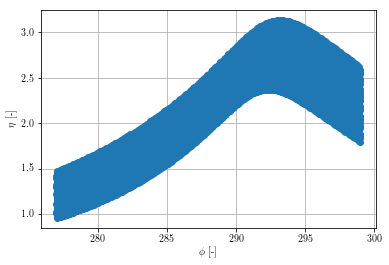

In [15]:
plt.plot(T,dT,'o')
plt.grid()
plt.xlabel('$\phi$ [-]')
#plt.ylabel('$\dot{Q}_\mathrm{C}$ [W]')
plt.ylabel('$\eta$ [-]')
#plt.savefig('Eta.png',format = 'png', dpi=1000,bbox_inches='tight')

In [21]:
M = curve_fit(dTad,(H,T),dT)
#M = curve_fit(eta,phi, Qc,bounds=([-100,-100], [100,100]))
M

(array([ 0.46734662, 12.23618205, -3.96483747]),
 array([[ 3.11151827e+13, -2.24460795e+14,  5.65273422e+11],
        [-2.24460795e+14,  3.13154290e+15,  2.18366626e+13],
        [ 5.65273422e+11,  2.18366626e+13,  1.23297565e+13]]))

def eta(X,a,b,c,d,e,f,g,h,i):

    Pi1,Pi2,Pi3,Pi4,Pi5,Pi6,Pi7 = X
    
    return (a*(Pi1**b)*(Pi2**c)*(Pi3**d)*(Pi4**e)*(Pi5**f)*(Pi6**g)*Pi7**h)

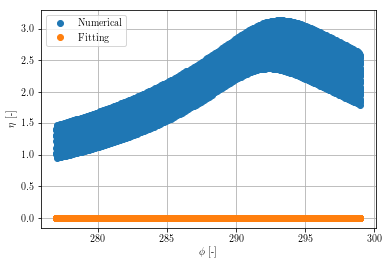

In [19]:
plt.plot(T,dT,'o',label = 'Numerical')
plt.plot(T,dTad((H,T),M[0][0],M[0][1],M[0][2]),'o',label = 'Fitting')
plt.xlabel('$\phi$ [-]')
plt.ylabel('$\eta$ [-]')
plt.legend()
plt.grid()


In [288]:
Erro_rel = (Qc-eta((phi,L,D/L,dp,dT,CA_s,CA_f,Wp),M[0][0],M[0][1],M[0][2],M[0][3],M[0][4],M[0][5],M[0][6],M[0][7],M[0][8]))/Qc*100

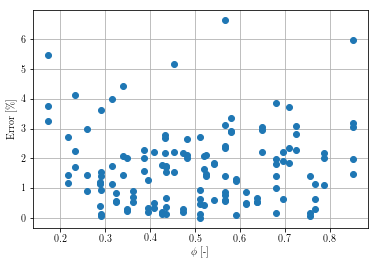

In [289]:
plt.plot(phi,abs(Erro_rel),'o')
plt.xlabel('$\phi$ [-]')
plt.ylabel('Error [$\%$]')
plt.grid()

plt.savefig('Error_Restricted_8.png',format = 'png', dpi=1000,bbox_inches='tight')

In [290]:
sum(abs(Erro_rel))

224.8230252730225